<a href="https://colab.research.google.com/github/AkinyemiGbenga/CODSOFT/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# load the dataset using Pandas
iris_data = pd.read_csv('/content/IRIS.csv')

Exploratory Data Analysis

In [3]:
# print the first 5 rows of the dataset
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# check number of rows and columns
iris_data.shape

(150, 5)

In [5]:
# getting information about the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# check for missing values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# getting information about the Iris dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# display summary statistics for each numerical column
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data Visualisations

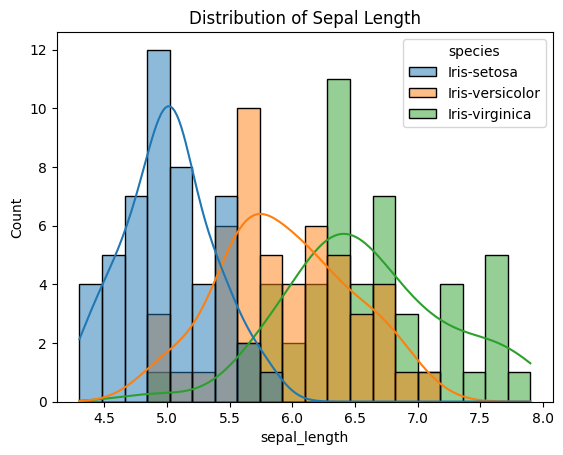

In [9]:
# Visualizing the distribution of the Sepal Length feature using histograms or kernel density plots
sns.histplot(data=iris_data, x='sepal_length', kde=True, bins=20, hue='species')
plt.title('Distribution of Sepal Length')
plt.show()
# Repeat for other numerical columns


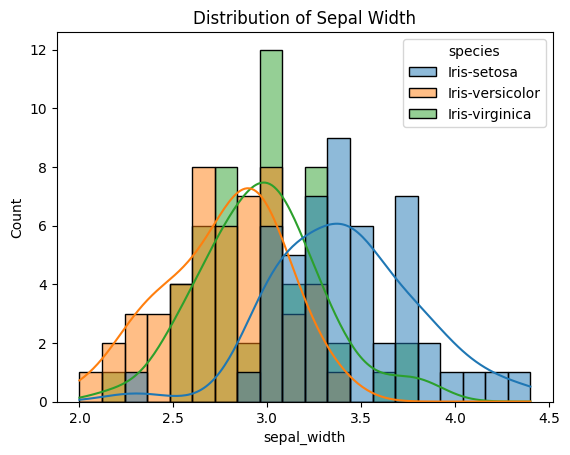

In [10]:
# Visualizing the distribution of the Sepal Width feature using histograms or kernel density plots
sns.histplot(data=iris_data, x='sepal_width', kde=True, bins=20, hue='species')
plt.title('Distribution of Sepal Width')
plt.show()



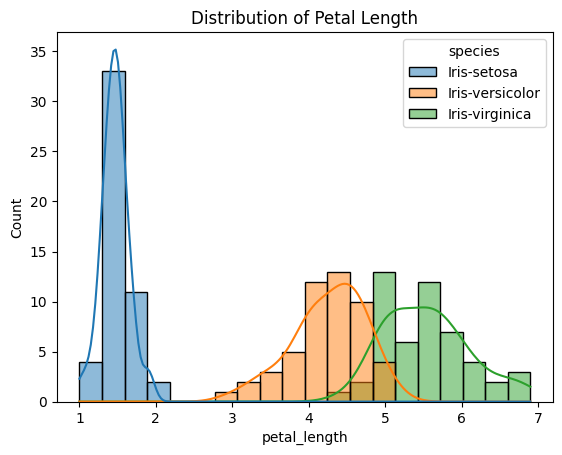

In [11]:
# Visualizing the distribution of the Petal Length feature using histograms or kernel density plots
sns.histplot(data=iris_data, x='petal_length', kde=True, bins=20, hue='species')
plt.title('Distribution of Petal Length')
plt.show()



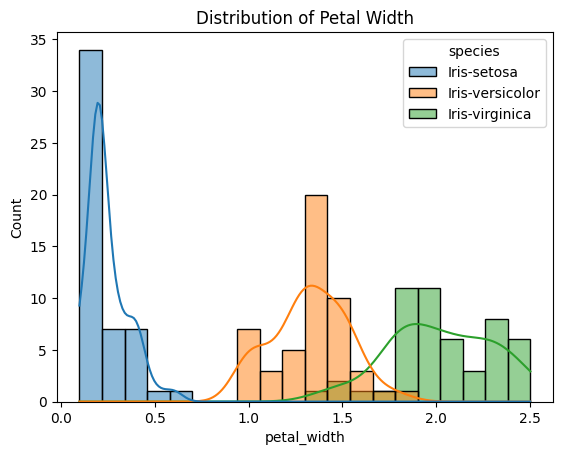

In [12]:
# Visualizing the distribution of the Petal width feature using histograms or kernel density plots
sns.histplot(data=iris_data, x='petal_width', kde=True, bins=20, hue='species')
plt.title('Distribution of Petal Width')
plt.show()



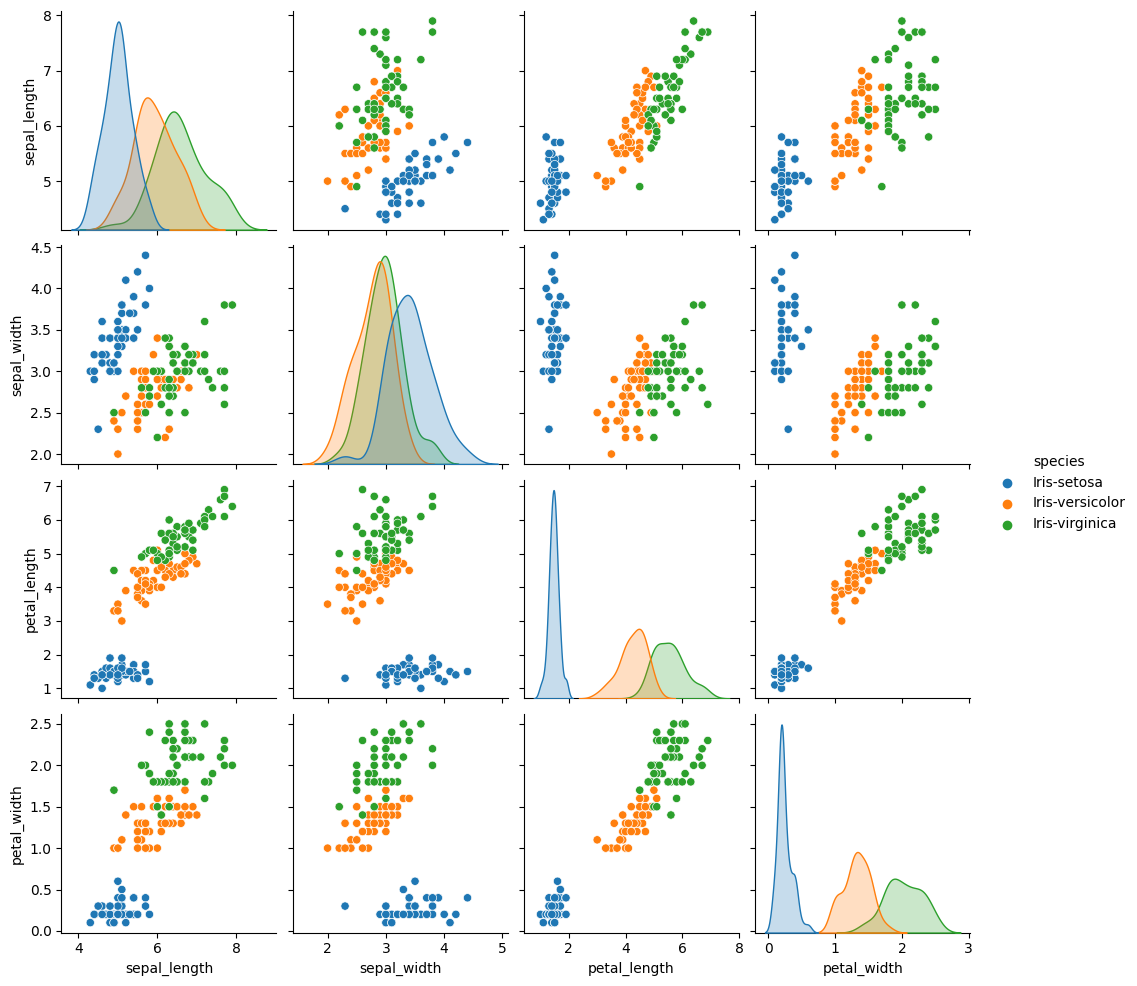

In [13]:
# Exploring the pairwise relationships between numerical features using a pair plot.
sns.pairplot(iris_data, hue='species')
plt.show()


The scattered plots above shows that there are very few outliers in the measurements of the lenght and width of the Iris flowers across the three species and they are well clustered around each other.

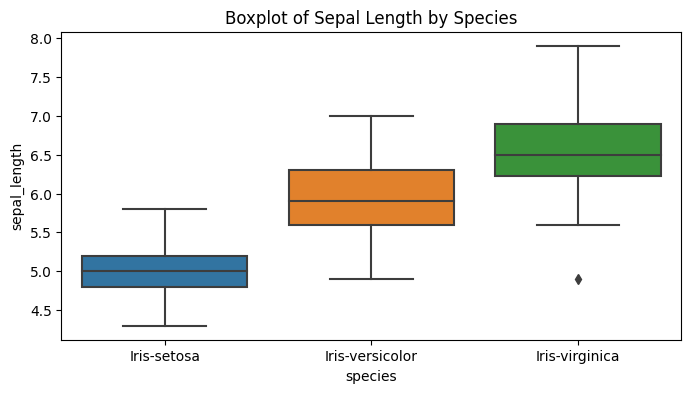

In [14]:
# Box plot of Sepal Length by Species
plt.figure(figsize=(8, 4))
sns.boxplot(x='species', y='sepal_length', data=iris_data)
plt.title('Boxplot of Sepal Length by Species')
plt.show()



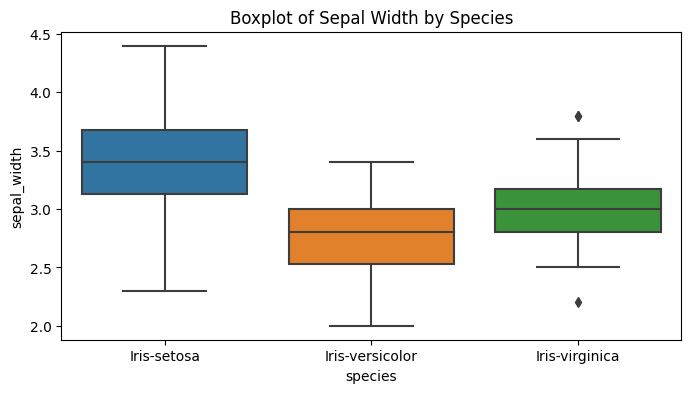

In [15]:
# Box plot of Sepal Width by Species
plt.figure(figsize=(8, 4))
sns.boxplot(x='species', y='sepal_width', data=iris_data)
plt.title('Boxplot of Sepal Width by Species')
plt.show()



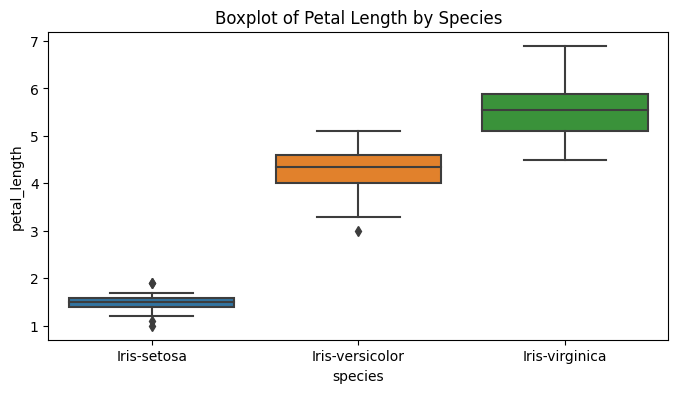

In [16]:
# Box plot of Petal Length by Species
plt.figure(figsize=(8, 4))
sns.boxplot(x='species', y='petal_length', data=iris_data)
plt.title('Boxplot of Petal Length by Species')
plt.show()



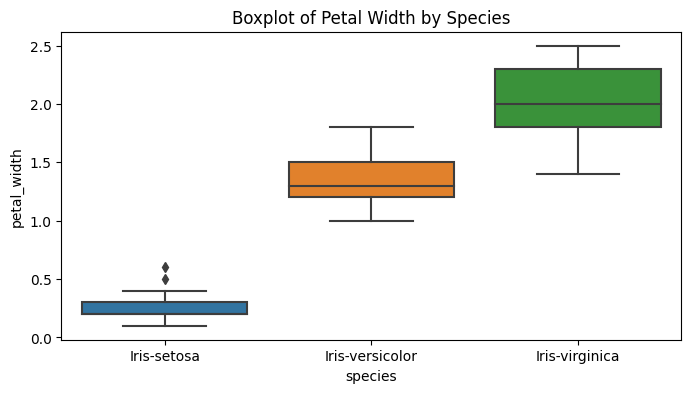

In [17]:
# Box plot of Petal Width by Species
plt.figure(figsize=(8, 4))
sns.boxplot(x='species', y='petal_width', data=iris_data)
plt.title('Boxplot of Petal Width by Species')
plt.show()



The boxplots above shows that there are no outliers in the petal width and petal lenght of the Iris virginica specie. Also,no outlier in the petal width of the Iris versicolor specie but there is an outlier in the petal length. The petal width and length of the Iris setosa species has lots of outliers

<ipython-input-18-df4dc814e715>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris_data.corr()


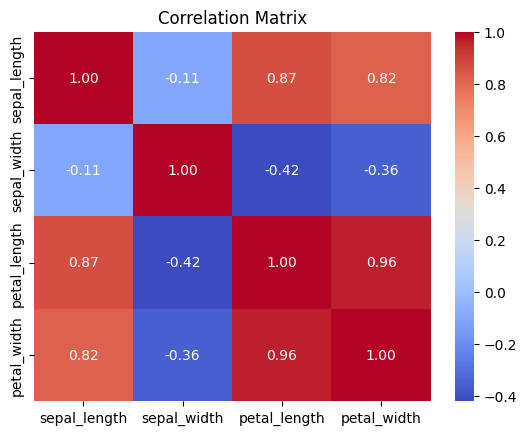

In [18]:
# Calculate and visualize the correlation matrix to understand the relationships between numerical features.
correlation_matrix = iris_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The correlation heatmap above shows that is a positive correlation of 0.87 between the sepal length and petal length and a negative corelation of - 0.36 betwwen the septal width and petal width.

Separate the columns containing the Feature variables and Target variables

In [19]:
# Separting the dependent variables x and the independent variable y
X = iris_data.drop('species', axis=1)
y = iris_data['species']

In [20]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [21]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


In [23]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Create and train the K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [27]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.92

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.82      0.97      0.89        29
 Iris-virginica       0.95      0.77      0.85        26

       accuracy                           0.92        90
      macro avg       0.93      0.91      0.91        90
   weighted avg       0.93      0.92      0.92        90



In [28]:
# Using confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[35  0  0]
 [ 0 28  1]
 [ 0  6 20]]


Interpretation of the confusion matrix: There are 35 instances correctly predicted as True Positive, There are 28 instances correctly predicted as True Negative, there is an instance predicted as False Positive  and there are 6 instances wrongly predicted as False Negative.

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.93
Recall: 0.92
F1 Score: 0.92


In [30]:
# Example of tuning k in KNN
for k in range(1, 10):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy:.2f}")


Accuracy for k=1: 0.93
Accuracy for k=2: 0.91
Accuracy for k=3: 0.92
Accuracy for k=4: 0.91
Accuracy for k=5: 0.92
Accuracy for k=6: 0.91
Accuracy for k=7: 0.94
Accuracy for k=8: 0.94
Accuracy for k=9: 0.96
